In [14]:
from qiskit import *
from qiskit.visualization import plot_bloch_multivector, visualize_transition, plot_histogram
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Operator
from sympy import Matrix, init_printing
from IPython.display import display, Latex
import numpy as np

In [15]:
# Create a quantum circuit with 2 qubits
# The default initial state of qubits will be |0> or [1,0]
qc = QuantumCircuit(2)

In [16]:
#Applying the hadarmad gate to target
qc.sdg(1)
#apply the cx gate to both qubits
qc.cx(0,1)
#Applying the hadarmad gate to target
qc.s(1)

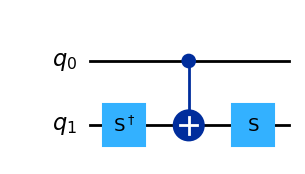

In [17]:
#Draw the circuit
qc.draw('mpl')

<IPython.core.display.Latex object>

{'00': 1024}


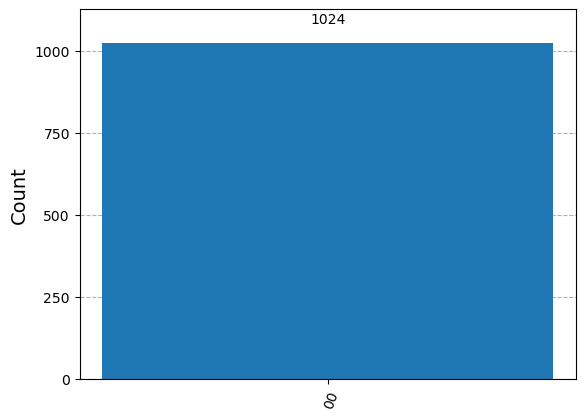

In [18]:
# Get the unitary matrix
unitary = Operator(qc).data

# Convert the unitary matrix to a LaTeX string
matrix_latex = "\\begin{bmatrix}\n"
for row in unitary:
    matrix_latex += " & ".join([f"{elem:.2f}" for elem in row]) + " \\\\\n"
matrix_latex += "\\end{bmatrix}"

# Display the unitary matrix in LaTeX format
display(Latex(f"$\\text{{UnitaryMatrix}} = {matrix_latex}$"))

# Add measurements if you want to run the circuit
qc.measure_all()

# Get the backend for the circuit
backend = AerSimulator()

# Transpile and run the circuit
qc_compiled = transpile(qc, backend)
job_sim = backend.run(qc_compiled, shots=1024)
result_sim = job_sim.result()

# Get and display the counts
counts = result_sim.get_counts(qc_compiled)
print(counts)
plot_histogram(counts)

In [8]:
#Get the backend for the circuit (simulator or realtime system)
backend = Aer.get_backend('statevector_simulator')

In [9]:
#execute the circuit using the backend
out = execute(qc,backend).result().get_statevector()

In [10]:
#import qiskit_textbook and display the statevector
#from qiskit_textbook.tools import array_to_latex
array_to_latex(out, pretext = "\\text{Statevector} = ")

<IPython.core.display.Math object>

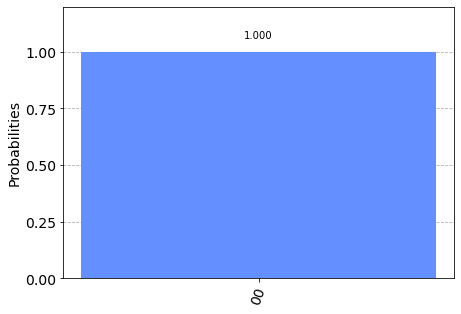

In [11]:
#execute the circuit and get the plain result
out = execute(qc,backend).result()

counts = out.get_counts()

plot_histogram(counts)